In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cellphones-recommendations/cellphones ratings.csv
/kaggle/input/cellphones-recommendations/cellphones data.csv
/kaggle/input/cellphones-recommendations/cellphones users.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [4]:
df = pd.read_csv('/kaggle/input/cellphones-recommendations/cellphones data.csv')
df.head()

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,24/09/2021
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,24/09/2021
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2021
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,24/09/2021


In [5]:
df.columns

Index(['cellphone_id', 'brand', 'model', 'operating system', 'internal memory',
       'RAM', 'performance', 'main camera', 'selfie camera', 'battery size',
       'screen size', 'weight', 'price', 'release date'],
      dtype='object')

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cellphone_id      33 non-null     int64  
 1   brand             33 non-null     object 
 2   model             33 non-null     object 
 3   operating system  33 non-null     object 
 4   internal memory   33 non-null     int64  
 5   RAM               33 non-null     int64  
 6   performance       33 non-null     float64
 7   main camera       33 non-null     int64  
 8   selfie camera     33 non-null     int64  
 9   battery size      33 non-null     int64  
 10  screen size       33 non-null     float64
 11  weight            33 non-null     int64  
 12  price             33 non-null     int64  
 13  release date      33 non-null     object 
dtypes: float64(2), int64(8), object(4)
memory usage: 3.7+ KB
None


In [7]:
print(df.isnull().sum())

cellphone_id        0
brand               0
model               0
operating system    0
internal memory     0
RAM                 0
performance         0
main camera         0
selfie camera       0
battery size        0
screen size         0
weight              0
price               0
release date        0
dtype: int64


In [8]:
# Basic statistics for numeric columns
print(df.describe())

       cellphone_id  internal memory        RAM  performance  main camera  \
count      33.00000        33.000000  33.000000    33.000000    33.000000   
mean       16.00000       148.363636   6.787879     6.219091    41.333333   
std         9.66954        92.197417   2.712904     2.885472    26.350601   
min         0.00000        32.000000   3.000000     1.020000    12.000000   
25%         8.00000       128.000000   4.000000     3.800000    12.000000   
50%        16.00000       128.000000   8.000000     6.880000    50.000000   
75%        24.00000       128.000000   8.000000     7.940000    50.000000   
max        32.00000       512.000000  12.000000    11.000000   108.000000   

       selfie camera  battery size  screen size      weight        price  
count      33.000000     33.000000    33.000000   33.000000    33.000000  
mean       15.484848   4320.666667     6.433333  197.363636   628.272727  
std        10.028463    818.746590     0.476095   25.379394   433.873057  
min   

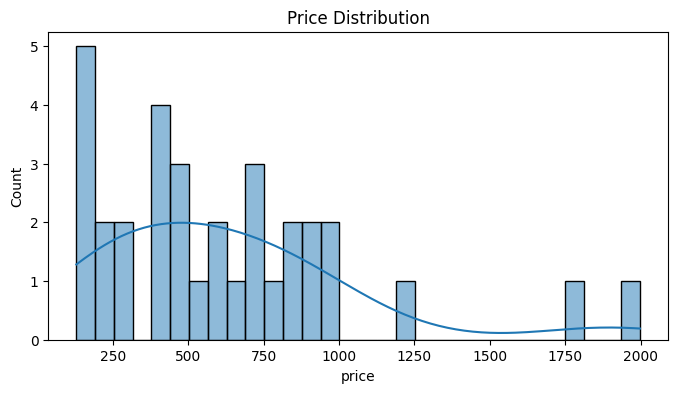

In [9]:
# Visualize price distribution
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

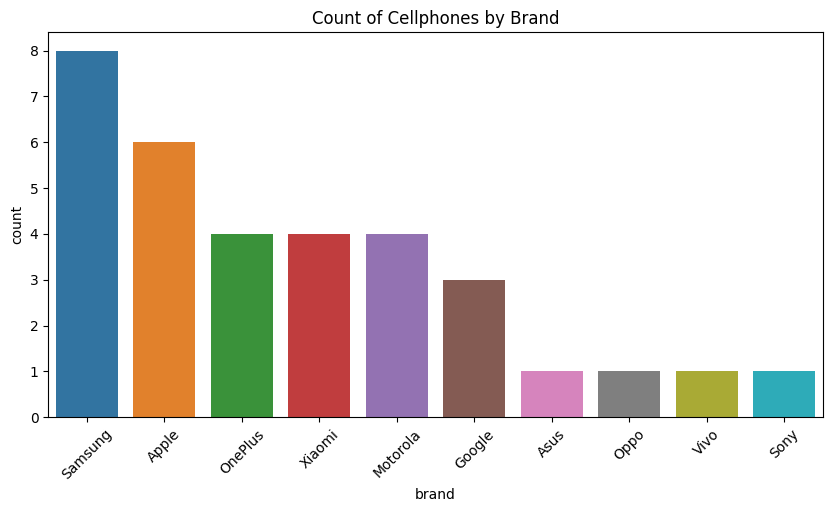

In [10]:
# Visualize count of brands
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index)
plt.title('Count of Cellphones by Brand')
plt.xticks(rotation=45)
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical columns (brand, model, operating system)
for col in ['brand', 'model', 'operating system']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Select only numeric columns for median calculation and fillna
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [12]:
# Prepare features and target
X = df.drop(['cellphone_id', 'price', 'release date'], axis=1)  # features
y = df['price']  # target

In [13]:
# Split into train-test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Define 5 ML regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train, predict and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    results[name] = rmse
    print(f'{name} RMSE: {rmse:.2f}')

Linear Regression RMSE: 153.10
Random Forest RMSE: 173.27
Gradient Boosting RMSE: 139.51
Support Vector Regression RMSE: 293.78
K-Nearest Neighbors RMSE: 356.93


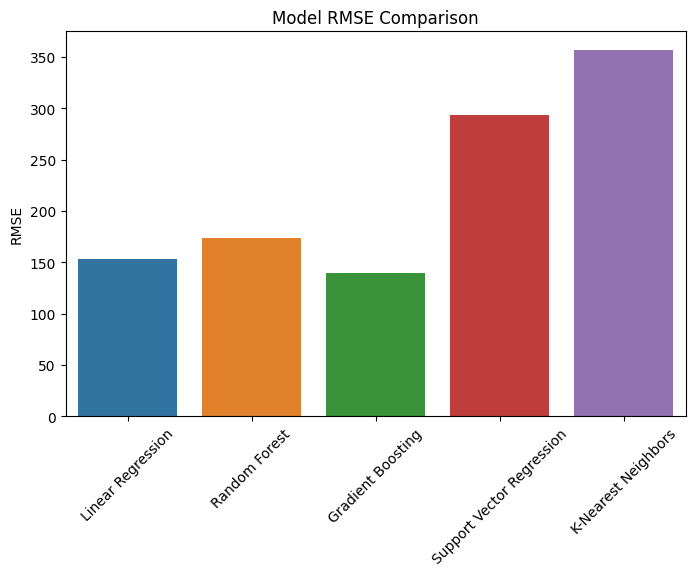

In [15]:
# Visualize model performance (lower RMSE is better)
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel('RMSE')
plt.title('Model RMSE Comparison')
plt.xticks(rotation=45)
plt.show()